In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
df = pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/train_cohort_bmi.csv.gz")

In [6]:
df["bmi_deciles"] = pd.qcut(df.bmi_residuals, q=10, labels=False)

In [24]:
df.loc[df.bmi_deciles==2].loc[:, "bmi"].median()

24.1445

In [21]:
df.loc[df.bmi_deciles==2].bmi.mean()

24.15733169687932

In [25]:
df.loc[df.bmi_deciles==8].bmi.mean()

31.95533040837566

<Axes: xlabel='bmi', ylabel='Count'>

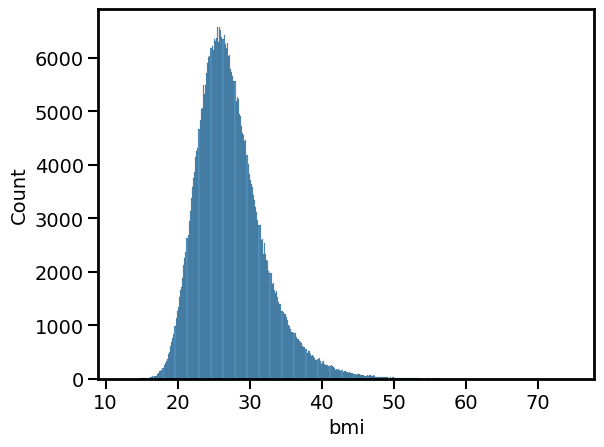

In [8]:
sns.histplot(data=df, x="bmi")

<Axes: xlabel='bmi_residuals', ylabel='Count'>

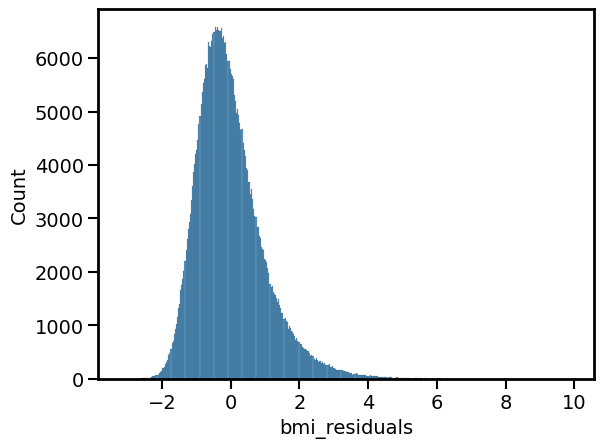

In [7]:
sns.histplot(data=df, x="bmi_residuals")

In [6]:
df

,sample_names,sex,genetic_kinship_to_other_participants,genetic_ethnic_grouping,genetic_sex,year_of_birth,bmi_prs,genetic_pca1,genetic_pca2,genetic_pca3,...,genetic_pca37,genetic_pca38,genetic_pca39,genetic_pca40,menopause,ethnic_background,bmi,age,bmi_scaled,bmi_residuals
0,1000028,Male,No kinship found,Caucasian,1,1947.0,-0.652309,-1.029461,-0.033549,-0.315733,...,0.049322,-1.300616,-2.121934,-0.528176,NaN,British,25.50385,1.053544,-0.400577,-0.524343
1,1000045,Female,At least one relative identified,Caucasian,0,1952.0,-1.084330,-0.369357,-0.098738,-0.507633,...,-0.456448,0.116991,0.172979,-2.491580,Yes,British,23.71090,-0.190080,-0.777235,-0.693649
2,1000171,Female,No kinship found,Caucasian,0,1944.0,-0.980411,-0.376505,-0.713271,0.181516,...,1.631279,-1.801102,-0.090621,-0.755636,Yes,British,30.92310,1.426632,0.737883,0.790895
3,1000196,Female,No kinship found,NaN,0,1959.0,0.032952,9.538714,-20.612926,-11.759402,...,-0.532454,0.757437,-1.405996,0.201243,inconsistent,British,19.57480,-0.563167,-1.646135,-1.507359
4,1000222,Male,No kinship found,Caucasian,1,1940.0,0.092755,0.519034,0.464794,-0.537884,...,-1.860359,0.699673,0.216137,3.912200,NaN,British,30.00600,1.302269,0.545221,0.385000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429176,6024948,Male,No kinship found,Caucasian,1,1953.0,0.321514,0.161480,0.513743,-0.107824,...,0.170184,0.109723,0.542855,-4.138590,NaN,British,47.22080,-0.314442,4.161656,4.108378
429177,6025016,Male,No kinship found,Caucasian,1,1942.0,-1.162700,0.963555,-0.350572,0.459666,...,0.009254,0.097536,0.024960,-0.583682,NaN,British,26.56900,1.053544,-0.176814,-0.305788
429178,6025119,Male,At least one relative identified,Caucasian,1,1957.0,0.968325,0.026657,-0.306253,-0.329196,...,0.084218,0.548108,-1.157870,1.978230,NaN,British,30.07590,-0.252261,0.559906,0.447209
429179,6025181,Male,No kinship found,Caucasian,1,1964.0,-0.119517,0.051333,-0.828925,-0.318871,...,-0.747383,0.706411,-0.349507,5.136710,NaN,British,26.49910,-1.558066,-0.191498,-0.199938
